### Imports et initialisation:

In [13]:
from stahl_model import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('seaborn-v0_8')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
Y_0 = np.random.uniform(0, 1, size=(N, Nb_preferences2))
Y_0 = Y_0 / Y_0.sum()  # Decrit la demographie initiale: Y[n, k] est la proportion d'individus de niveau
                       # d'intelligence n et ayant le la preference secondaire k.

### Figure 1

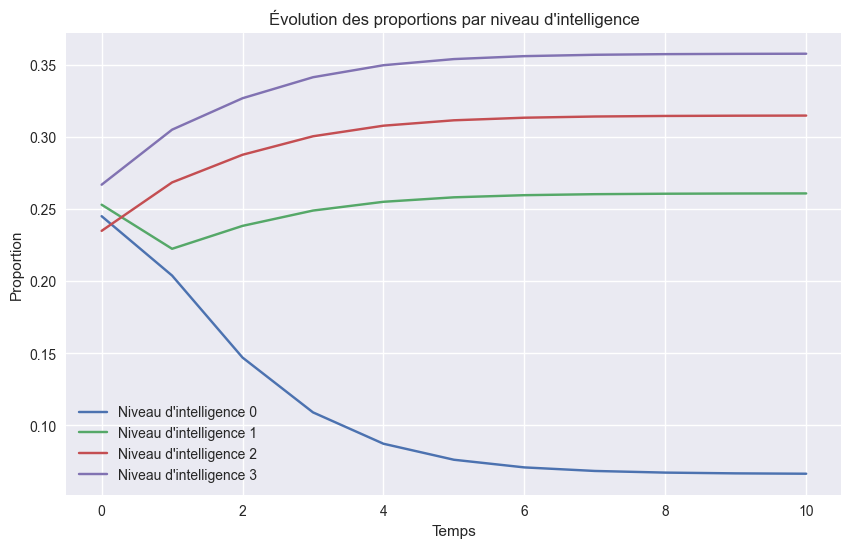

In [15]:
Y = run_simulation(M, Y_0, T=10, nu=0.1)

plt.figure(figsize=(10, 6))
for n in range(N):
    proportions_n = [np.sum(Y_t[n, :]) for Y_t in Y]
    plt.plot(proportions_n, label=f'Niveau d\'intelligence {n}')
plt.xlabel('Temps')
plt.ylabel('Proportion')
plt.title('Évolution des proportions par niveau d\'intelligence')
plt.legend()
plt.show()

### Figure 2 On ajoute un cout d'inteligence

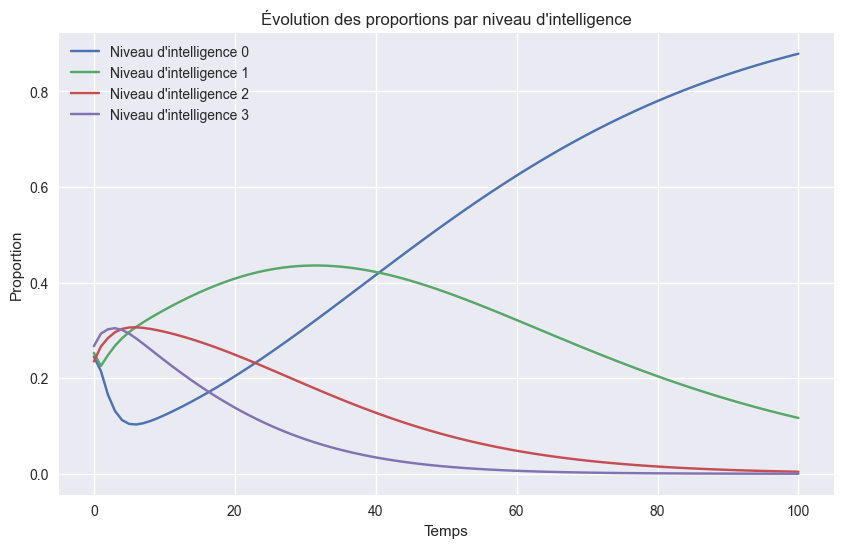

In [16]:
cout_intelligence = np.linspace(0, 1, N)  # Exemple de coût croissant avec le niveau d'intelligence
Y = run_simulation(M, Y_0, T=100, nu=0.1, cout_intelligence=cout_intelligence)

plt.figure(figsize=(10, 6))
for n in range(N):
    proportions_n = [np.sum(Y_t[n, :]) for Y_t in Y]
    plt.plot(proportions_n, label=f'Niveau d\'intelligence {n}')
plt.xlabel('Temps')
plt.ylabel('Proportion')
plt.title('Évolution des proportions par niveau d\'intelligence')
plt.legend()
plt.show()